In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\acer\\Downloads\\netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
round(df.isnull().sum()/8807*100)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

In [8]:
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [9]:
df['director'].mode()

0    Rajiv Chilaka
dtype: object

In [10]:
df['director'] = df['director'].fillna(df['director']=="Not Available")

In [11]:
df['cast'].unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [12]:
df['cast'] = df['cast'].fillna(df['cast']=='Not Available')

In [13]:
df['country'].value_counts()

United States                                            2818
India                                                     972
United Kingdom                                            419
Japan                                                     245
South Korea                                               199
                                                         ... 
Poland,                                                     1
Mexico, Brazil                                              1
United Kingdom, Canada, United States, Cayman Islands       1
United States, Hungary, Ireland, Canada                     1
United Kingdom, Denmark, Canada, Croatia                    1
Name: country, Length: 748, dtype: int64

In [14]:
df['country'] = df['country'].fillna(df['country']=='Not Available')

In [15]:
from datetime import datetime as dt

In [16]:
df['date_added'].mode()

0    January 1, 2020
dtype: object

In [17]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [18]:
df['Day'] = pd.to_datetime(df['date_added']).dt.day
df['Month'] = pd.to_datetime(df['date_added']).dt.month
df['Year'] = pd.to_datetime(df['date_added']).dt.year

In [19]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
df['rating'].mode()

0    TV-MA
dtype: object

In [21]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [22]:
df['duration'].mode()

0    1 Season
dtype: object

In [23]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [24]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Day             0
Month           0
Year            0
dtype: int64

In [45]:
from datetime import datetime as dt

In [46]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  Day           8807 non-null   int64         
 13  Month         8807 non-null   int64         
 14  Year          8807 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

In [25]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='Count'>

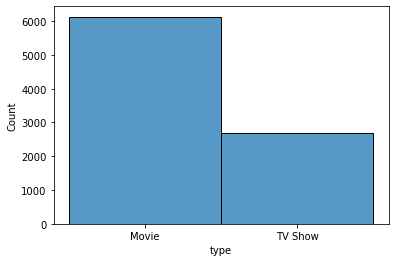

In [26]:
sns.histplot(df['type'])

In [48]:
df.groupby(df['country'])['director'].value_counts()

country       director                             
False         False                                    409
              Rajiv Chilaka                             16
              Suhas Kadav                               15
              Prakash Satam                              7
              Hidenori Inoue                             6
                                                      ... 
Vietnam       Nguyen Thanh Tung                          1
              Van M. Pham                                1
              Victor Vu                                  1
West Germany  Joachim Fest, Christian Herrendoerfer      1
Zimbabwe      Tomas Brickhill                            1
Name: director, Length: 5180, dtype: int64

In [27]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

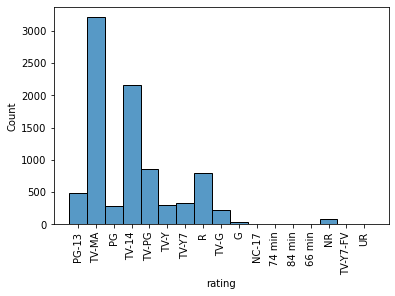

In [29]:
sns.histplot(df['rating'])
plt.xticks(rotation='vertical');

# Movie

In [30]:
a = df.iloc[np.where(df['type']=='Movie')]

In [31]:
a.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,False,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",False,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,24,9,2021


In [32]:
a['release_year'].unique()

array([2020, 2021, 1993, 1996, 1998, 1997, 2010, 2013, 2017, 1975, 1978,
       1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011, 2008, 2009, 2007,
       2005, 2006, 2018, 2019, 1994, 2015, 1982, 1989, 2014, 1990, 1991,
       1999, 2016, 1986, 1984, 1980, 1961, 2000, 1995, 1985, 1992, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1960, 1974, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

<AxesSubplot:xlabel='release_year', ylabel='Count'>

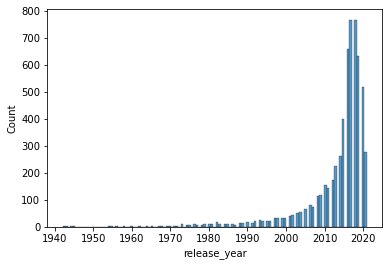

In [33]:
sns.histplot(a['release_year'])

In [34]:
a['rating'].value_counts()

TV-MA       2064
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

In [35]:
a['duration'].agg([max,min])

max      99 min
min    1 Season
Name: duration, dtype: object

In [50]:
a['release_year'].agg([max,min])

max    2021
min    1942
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

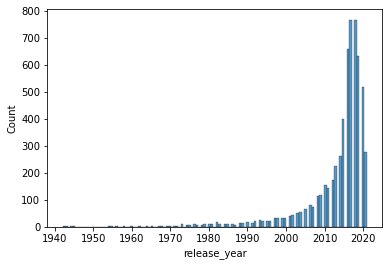

In [52]:
sns.histplot(a['release_year'])

In [53]:
a.groupby(['director'])['title'].max()

director
False                     Zulu Man in Japan
A. L. Vijay                        Watchman
A. Raajdheep                     Asura Guru
A. Salaam                         Salaakhen
A.R. Murugadoss                      Spyder
                               ...         
Çagan Irmak                  Babam ve Oğlum
Ísold Uggadóttir       And Breathe Normally
Óskar Thór Axelsson              Ég man þig
Ömer Faruk Sorak                    G.O.R.A
Şenol Sönmez            Kill Me If You Dare
Name: title, Length: 4355, dtype: object

In [55]:
a.groupby(['release_year'])['title'].value_counts()

release_year  title                                        
1942          Prelude to War                                   1
              The Battle of Midway                             1
1943          Undercover: How to Operate Behind Enemy Lines    1
              WWII: Report from the Aleutians                  1
              Why We Fight: The Battle of Russia               1
                                                              ..
2021          Worth                                            1
              Xico's Journey                                   1
              Xtreme                                           1
              YES DAY                                          1
              You vs. Wild: Out Cold                           1
Name: title, Length: 6131, dtype: int64

In [56]:
pd.DataFrame(a.groupby(['title','rating'])['listed_in'].value_counts())

,,,listed_in
title,rating,listed_in,
#Alive,TV-MA,"Horror Movies, International Movies, Thrillers",1
#AnneFrank - Parallel Stories,TV-14,"Documentaries, International Movies",1
#FriendButMarried,TV-G,"Dramas, International Movies, Romantic Movies",1
#FriendButMarried 2,TV-G,"Dramas, International Movies, Romantic Movies",1
#Roxy,TV-14,"Comedies, Romantic Movies",1
...,...,...,...
​Maj Rati ​​Keteki,TV-14,"Dramas, International Movies",1
​Mayurakshi,TV-14,"Dramas, International Movies",1
​​Kuch Bheege Alfaaz,TV-14,"Dramas, Independent Movies, International Movies",1


In [57]:
# Only one director in TV Shows
pd.DataFrame(a.groupby(['director'])['cast'].value_counts())

cast
director            cast                                                    
False               False                                                 54
                    David Spade, London Hughes, Fortune Feimster           5
                    David Attenborough                                     4
                    Michela Luci, Jamie Watson, Eric Peterson, Anna...     4
                    Derren Brown                                           3
...                                                                      ...
Óskar Thór Axelsson Jóhannes Haukur Jóhannesson, Ágústa Eva Erlends...     1
Ömer Faruk Sorak    Cem Yılmaz, Rasim Öztekin, Özkan Uğur, İdil Fır...     1
                    Mehmet Günsür, Belçim Bilgin, Ayda Aksel, Altan...     1
Şenol Sönmez        Ali Sunal, Hatice Şendil, Ayda Aksel, Ahmet Sar...     1
                    Murat Boz, Seda Bakan, Açelya Topaloğlu, Özgür ...     1

[5937 rows x 1 columns]

# TV Shows

In [58]:
b = df.iloc[np.where(df['type']=='TV Show')]

In [60]:
b.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
1,s2,TV Show,Blood & Water,False,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",False,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021
3,s4,TV Show,Jailbirds New Orleans,False,False,False,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,s5,TV Show,Kota Factory,False,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",False,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,24,9,2021


In [61]:
b.shape

(2676, 15)

In [62]:
b['title'].unique()

array(['Blood & Water', 'Ganglands', 'Jailbirds New Orleans', ...,
       'Zak Storm', 'Zindagi Gulzar Hai', 'Zombie Dumb'], dtype=object)

In [63]:
b['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

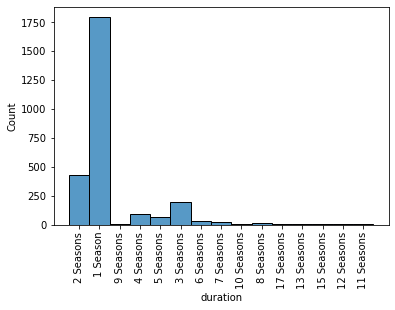

In [72]:
sns.histplot(b['duration'])
plt.xticks(rotation='vertical');

In [77]:
b['release_year'].unique()

array([2021, 2020, 2018, 2014, 1994, 2015, 2013, 2019, 2017, 2016, 2012,
       1992, 2002, 2009, 2011, 2005, 2008, 2010, 2007, 2001, 2006, 1993,
       1997, 2003, 1945, 1999, 1998, 2000, 2004, 1986, 1995, 1925, 1972,
       1974, 1988, 1991, 1977, 1979, 1990, 1996, 1981, 1946, 1985, 1967,
       1989, 1963], dtype=int64)

In [87]:
b['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1998      4
2000      4
1993      4
1997      4
1990      3
1996      3
1992      3
1988      2
1986      2
1994      2
1995      2
1946      1
1991      1
1989      1
1985      1
1981      1
1979      1
1977      1
1967      1
1972      1
1945      1
1925      1
1974      1
1963      1
Name: release_year, dtype: int64

<AxesSubplot:xlabel='release_year', ylabel='Count'>

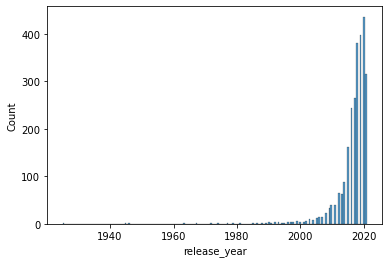

In [78]:
sns.histplot(b['release_year'])

In [79]:
b['rating'].unique()

array(['TV-MA', 'TV-14', 'TV-Y7', 'TV-PG', 'TV-Y', 'TV-G', 'R', 'NR',
       'TV-Y7-FV'], dtype=object)

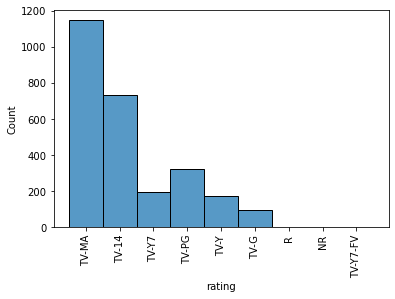

In [100]:
sns.histplot(b['rating'])
plt.xticks(rotation='vertical');

In [83]:
b.groupby(['release_year'])['title'].value_counts()

release_year  title                              
1925          Pioneers: First Women Filmmakers*      1
1945          Five Came Back: The Reference Films    1
1946          Pioneers of African-American Cinema    1
1963          The Twilight Zone (Original Series)    1
1967          The Andy Griffith Show                 1
                                                    ..
2021          Yasuke                                 1
              You Are My Spring                      1
              Young Royals                           1
              Zero                                   1
              Zero Chill                             1
Name: title, Length: 2676, dtype: int64

In [84]:
b['duration'].agg([max,min])

max    9 Seasons
min     1 Season
Name: duration, dtype: object

In [86]:
b['rating'].value_counts()

TV-MA       1147
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

In [88]:
pd.DataFrame(b.groupby(['title','rating'])['listed_in'].value_counts())

,,,listed_in
title,rating,listed_in,
#blackAF,TV-MA,TV Comedies,1
(Un)Well,TV-MA,Reality TV,1
100 Days My Prince,TV-14,"International TV Shows, Romantic TV Shows, TV Dramas",1
100 Humans,TV-14,"Docuseries, Science & Nature TV",1
100% Hotter,TV-14,"British TV Shows, International TV Shows, Reality TV",1
...,...,...,...
แผนร้ายนายเจ้าเล่ห์,TV-14,"International TV Shows, Romantic TV Shows, TV Comedies",1
​SAINT SEIYA: Knights of the Zodiac,TV-14,"Anime Series, International TV Shows",1
忍者ハットリくん,TV-Y7,"Anime Series, Kids' TV",1


In [89]:
pd.DataFrame(b.groupby(['director'])['cast'].value_counts())

cast
director                             cast                                                    
False                                False                                                298
                                     David Attenborough                                    11
                                     Michela Luci, Jamie Watson, Anna Claire Bartlam...     4
                                     Bettany Hughes                                         2
                                     Bob Brisbane                                           2
...                                                                                       ...
Vijay S. Bhanushali                  Meghna Erande Joshi, Parminder Ghumman                 1
Vikramaditya Motwane, Anurag Kashyap Saif Ali Khan, Nawazuddin Siddiqui, Radhika Apt...     1
Wouter Bouvijn                       Maaike Neuville, Charlotte De Bruyne, Tom Verme...     1
Yasuhiro Irie                        Romi Park, Rie Kugimiya, Megumi Takamoto, Shini...     1
Ziad Doueiri                         Eric Cantona, Suzanne Clément, Alex Lutz, Gusta...     1

[2340 rows x 1 columns]

# Information about India

In [90]:
i = df.iloc[np.where(df['country']=="India")]

In [91]:
i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
4,s5,TV Show,Kota Factory,False,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,9,2021
39,s40,TV Show,Chhota Bheem,False,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",16,9,2021
50,s51,TV Show,Dharmakshetra,False,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",15,9,2021
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,False,False,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,15,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,1,1,2018
8775,s8776,TV Show,Yeh Meri Family,False,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"International TV Shows, TV Comedies","In the summer of 1998, middle child Harshu bal...",31,8,2018
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,31,12,2019
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,15,2,2018


In [92]:
i['type'].value_counts()

Movie      893
TV Show     79
Name: type, dtype: int64

In [93]:
i[i['type']=='TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
4,s5,TV Show,Kota Factory,False,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
39,s40,TV Show,Chhota Bheem,False,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",16,9,2021
50,s51,TV Show,Dharmakshetra,False,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",15,9,2021
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,False,False,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...,15,9,2021
69,s70,TV Show,Stories by Rabindranath Tagore,False,False,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,15,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,False,False,India,2019-05-25,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...,25,5,2019
8235,s8236,TV Show,The Calling,Bumpy,False,India,2019-04-01,2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...,1,4,2019
8321,s8322,TV Show,The Golden Years with Javed Akhtar,False,False,India,2017-06-01,2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t...",1,6,2017
8349,s8350,TV Show,The House That Made Me,False,Vinay Pathak,India,2017-03-31,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret...",31,3,2017


In [94]:
i[i['type']=='Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,21,9,2021
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,2021-09-05,2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,5,9,2021
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,2021-09-02,1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...,2,9,2021
116,s117,Movie,Dhanak,Nagesh Kukunoor,"Krrish Chhabria, Hetal Gada, Vipin Sharma, Gul...",India,2021-09-02,2015,TV-PG,114 min,"Comedies, Dramas, Independent Movies",A movie-loving 10-year-old and her blind littl...,2,9,2021
118,s119,Movie,Gurgaon,Shanker Raman,"Akshay Oberoi, Pankaj Tripathi, Ragini Khanna,...",India,2021-09-02,2017,TV-14,106 min,"Dramas, International Movies, Thrillers",When the daughter of a wealthy family returns ...,2,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,2017-05-01,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ...",1,5,2017
8773,s8774,Movie,Yanda Kartavya Aahe,Kedar Shinde,"Ankush Choudhary, Smita Shewale, Mohan Joshi, ...",India,2018-01-01,2006,TV-PG,151 min,"Comedies, Dramas, International Movies",Thanks to an arranged marriage that was design...,1,1,2018
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,2019-12-31,2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...,31,12,2019
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,15,2,2018


In [95]:
i['rating'].value_counts()

TV-14       550
TV-MA       248
TV-PG       134
TV-Y7        14
TV-G          9
TV-Y          5
PG-13         4
NR            4
PG            2
R             1
TV-Y7-FV      1
Name: rating, dtype: int64

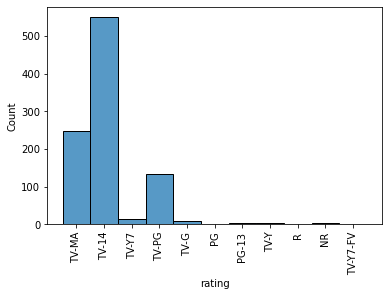

In [99]:
sns.histplot(i['rating'])
plt.xticks(rotation='vertical');

In [97]:
i.groupby(['director'])['title'].value_counts()

director                                                    title                       
False                                                       21 Sarfarosh: Saragarhi 1897    1
                                                            Adhugo                          1
                                                            Agent Raghav                    1
                                                            Akbar Birbal                    1
                                                            Alma Matters                    1
                                                                                           ..
Zakariya                                                    Sudani from Nigeria             1
Zoya Akhtar                                                 Dil Dhadakne Do                 1
                                                            Luck by Chance                  1
                                                            Zinda

In [101]:
i['release_year'].agg([max,min])

max    2021
min    1959
Name: release_year, dtype: int64

In [103]:
i.iloc[np.where(i['release_year']==2021)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
4,s5,TV Show,Kota Factory,False,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021
39,s40,TV Show,Chhota Bheem,False,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",16,9,2021
190,s191,Movie,Thimmarusu,Sharan Koppisetty,"Satya Dev, Priyanka Jawalkar, Brahmaji",India,2021-08-28,2021,TV-14,125 min,"Dramas, International Movies",Eight years after a young man is framed for mu...,28,8,2021
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-08-06,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions...",6,8,2021
551,s552,Movie,Haseen Dillruba,Vinil Mathew,"Taapsee Pannu, Vikrant Massey, Harshvardhan Ra...",India,2021-07-02,2021,TV-MA,136 min,"International Movies, Romantic Movies, Thrillers",Under investigation as a suspect in her husban...,2,7,2021
735,s736,Movie,Sarbath,Prabhakaran,"Kathir, Soori, Rahasya Gorak, Ashvatt",India,2021-06-11,2021,TV-PG,113 min,"Comedies, Dramas, International Movies",When a city man returns to his native village ...,11,6,2021
850,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"Ehan Bhat, Edilsy Vargas, Manisha Koirala, Lis...",India,2021-05-21,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...,21,5,2021
871,s872,Movie,Sardar Ka Grandson,Kaashvie Nair,"Arjun Kapoor, Neena Gupta, Rakul Preet Singh, ...",India,2021-05-18,2021,TV-14,140 min,"Comedies, Dramas, International Movies",A devoted grandson’s mission to reunite his ai...,18,5,2021
873,s874,Movie,Ahaan,Nikhil Pherwani,"Arif Zakaria, Abuli Mamaji, Niharika Singh, Ra...",India,2021-05-15,2021,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Jilted by his wife, a man with OCD finds eye-o...",15,5,2021
876,s877,TV Show,Alma Matters,False,False,India,2021-05-14,2021,TV-MA,1 Season,"Docuseries, International TV Shows",Alumni of India’s elite academic institutes sh...,14,5,2021


In [104]:
i.iloc[np.where(i['release_year']==1959)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day,Month,Year
542,s543,Movie,Ujala,Naresh Saigal,"Mala Sinha, Shammi Kapoor, Raaj Kumar, Leela C...",India,2021-07-06,1959,TV-14,143 min,"Dramas, International Movies",An honest man dreams of a better life for his ...,6,7,2021


In [105]:
i['director'].unique()

array([False, 'S. Shankar', 'Lijo Jose Pellissery', 'Rahul Rawail',
       'Nagesh Kukunoor', 'Shanker Raman', 'Vidhu Vinod Chopra',
       'Sharan Koppisetty', 'Sachin Yardi', 'Saurabh Kabra',
       'Partho Mitra', 'Santram Varma', 'Anil V. Kumar, Anurag Basu',
       'Sangeeth Sivan', 'Umesh Ghadge', 'David Dhawan',
       'Dibakar Banerjee', 'Apoorva Lakhia', 'Milan Luthria',
       'Pawan Kripalani', 'Bhushan Patel', 'Raj Nidimoru, Krishna D.K.',
       'Mani Ratnam',
       'Bejoy Nambiar, Priyadarshan, Karthik Narain, Vasanth Sai, Karthik Subbaraj, Arvind Swamy, Rathindran R Prasad, Sarjun, Gautham Vasudev Menon',
       'Rohit Shetty', 'Ram Gopal Varma', 'Rajiv Chilaka', 'Hardik Mehta',
       'Rajveer Singh Maan, Harpeet Singh', 'Pramod Pawar',
       'Naresh Saigal', 'Vinil Mathew', 'Prabhakaran',
       'Vishwesh Krishnamoorthy', 'Kaashvie Nair', 'Nikhil Pherwani',
       'Praveen Kandregula', 'Aditya Kripalani', 'Martin Prakkat',
       'Ivan Ayr', 'Vijay Roche', "Stanley M

<AxesSubplot:>

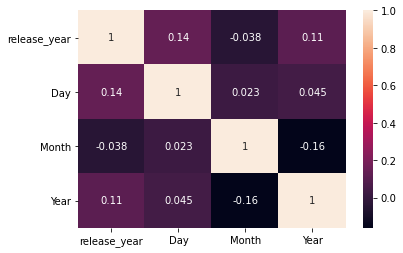

In [106]:
corr_mat = df.corr()
sns.heatmap(corr_mat , annot = True)